## Exercises I

Run `python -m pip install mysqlclient pymysql` from your terminal to install pymysql and the mysqlclient.

Create a notebook or python script named `advanced_dataframes` to do your work in for these exercises.

In [1]:
from multiprocessing.spawn import import_main_path
from pydataset import data 
from pydoc import importfile
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os 
# set a random seed:
np.random.seed(123)
os.path.exists('env.py')
env=importfile('env.py')


1. Create a function named `get_db_url`. It should accept a username, hostname, password, and database name and return a url connection string formatted like in the example at the start of this lesson.



In [2]:



def get_db_url(db, env_file=os.path.exists('env.py')):
    '''
    returns a formatted string ready to utilize as a sql url connection
    
    args: db: a string literal representing a schema
    env_file: bool: checks to see if there is an env.py present in the cwd
    
    make sure that if you have an env file that you import it outside of the scope 
    of this function call, otherwise env.user wont mean anything ;)
    '''
    if env_file:
        username, password, host = (env.username, env.password, env.host)
        return f'mysql+pymysql://{username}:{password}@{host}/{db}'
    else:
        return 'yo you need some credentials to access a database usually and I dont want you to type them here.'


2. Use your function to obtain a connection to the `employees` database.


In [3]:
query = 'SELECT * FROM employees LIMIT 100;'

schema = 'employees'
df = pd.read_sql(query, get_db_url(schema))
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


3. Once you have successfully run a query:

    a. Intentionally make a typo in the database url. What kind of error message do you see?
    
    b. Intentionally make an error in your SQL query. What does the error message look like?



In [4]:
# get_db_url = f'mql+pymysql://{user}:{password}@{host}/{schema}'

# query = 'SELECT * FROM employees LIMIT 100;'
# df = pd.read_sql(query, get_db_url)
# df

NoSuchModuleError: Can't load plugin: sqlalchemy.dialects:mql.pymysql

In [5]:
# get_db_url = f'mysql+pymysql://{user}:{password}@{host}/{schema}'

# query = 'Se* FROM employees LIMIT 100;'
# df = pd.read_sql(query, get_db_url)
# df

ProgrammingError: (pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'Se* FROM employees LIMIT 100' at line 1")
[SQL: Se* FROM employees LIMIT 100;]
(Background on this error at: https://sqlalche.me/e/14/f405)

4. Read the `employees` and `titles` tables into two separate DataFrames.


In [6]:
query = 'SELECT * FROM employees LIMIT 100;'
emp_df = pd.read_sql(query, get_db_url(schema))


In [7]:
query = 'SELECT * FROM titles LIMIT 100;'
titles_df = pd.read_sql(query, get_db_url(schema))

5. How many rows and columns do you have in each DataFrame? Is that what you expected?
> Yes since I limited it to 100 if I want a true result I need to take the limit off


In [8]:
emp_df.shape

(100, 6)

In [9]:
titles_df.shape


(100, 4)

6. Display the summary statistics for each DataFrame.


In [10]:
emp_df.describe()


,emp_no
count,100.000000
mean,10050.500000
std,29.011492
min,10001.000000
25%,10025.750000
50%,10050.500000
75%,10075.250000
max,10100.000000


In [11]:
titles_df.describe()

,emp_no
count,100.000000
mean,10034.320000
std,18.656859
min,10001.000000
25%,10018.000000
50%,10035.500000
75%,10050.000000
max,10066.000000


7. How many unique titles are in the `titles` DataFrame?


In [12]:
titles_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   emp_no     100 non-null    int64 
 1   title      100 non-null    object
 2   from_date  100 non-null    object
 3   to_date    100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


In [13]:
titles_df['title'].unique().shape

(6,)

8. What is the oldest date in the `to_date` column? 


In [14]:

titles_df['to_date'].min()

datetime.date(1987, 1, 27)

9. What is the most recent date in the `to_date` column?

In [15]:
titles_df['to_date'].max()


datetime.date(9999, 1, 1)

## Exercises II



1. Copy the `users` and `roles` DataFrames from the examples above. 



In [16]:
# Create the users DataFrame.

users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users


,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [17]:
# Create the roles DataFrame

roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles


,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [18]:
roles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4 non-null      int64 
 1   name    4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


2. What is the result of using a `right` join on the DataFrames? 



In [19]:
users.merge(roles, left_on='role_id', right_on='id', how='right', indicator=True)

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1,admin,both
1,2.0,joe,2.0,2,author,both
2,3.0,sally,3.0,3,reviewer,both
3,4.0,adam,3.0,3,reviewer,both
4,NaN,NaN,NaN,4,commenter,right_only


3. What is the result of using an `outer` join on the DataFrames?
     


In [20]:
users.merge(roles, left_on='role_id', right_on='id', how='outer', indicator=True)

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1.0,admin,both
1,2.0,joe,2.0,2.0,author,both
2,3.0,sally,3.0,3.0,reviewer,both
3,4.0,adam,3.0,3.0,reviewer,both
4,5.0,jane,NaN,NaN,NaN,left_only
5,6.0,mike,NaN,NaN,NaN,left_only
6,NaN,NaN,NaN,4.0,commenter,right_only


4. What happens if you drop the foreign keys from the DataFrames and try to merge them?



In [21]:
temp = users.merge(roles, 
            left_on='role_id', 
            right_on='id').drop(columns='role_id')
temp

,id_x,name_x,id_y,name_y
0,1,bob,1,admin
1,2,joe,2,author
2,3,sally,3,reviewer
3,4,adam,3,reviewer


5. Load the `mpg` dataset from PyDataset. 



In [22]:
mpg=data('mpg')

6. Output and read the documentation for the `mpg` dataset.



In [23]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




7. How many rows and columns are in the dataset?



In [24]:

mpg.shape

(234, 11)

8. Check out your column names and perform any cleanup you may want on them.



In [25]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


9. Display the summary statistics for the dataset.



In [26]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


10. How many different manufacturers are there?



In [27]:
diffmanufactures=mpg.groupby(['manufacturer']).count()
len(diffmanufactures)

15

11. How many different models are there?



In [28]:
models=mpg.groupby(['model']).count()
len(models)

38

12. Create a column named `mileage_difference` like you did in the DataFrames exercises; this column should contain the difference between highway and city mileage for each car.



In [29]:
mpg['mileage_difference']=abs(mpg.hwy-mpg.cty)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8


13. Create a column named `average_mileage` like you did in the DataFrames exercises; this is the mean of the city and highway mileage.



In [30]:
mpg['avg_mileage']=(mpg.cty+mpg.hwy)/2

In [31]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_difference,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0


14. Create a new column on the `mpg` dataset named `is_automatic` that holds boolean values denoting whether the car has an automatic transmission.



In [32]:
mpg['is_automatic']=mpg.trans.str.contains('auto')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_difference,avg_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True


This is me exploring it can be igored untill we reach the next markdown

In [33]:
mpg_auto=mpg.query('trans.str.contains("auto")')

In [34]:
mpg.merge(mpg_auto,how='inner')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_difference,avg_mileage,is_automatic
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True
1,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True
2,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True
3,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,9,22.5,True
4,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,9,20.5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,volkswagen,new beetle,2.5,2008,5,auto(s6),f,20,29,r,subcompact,9,24.5,True
169,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize,11,23.5,True
170,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5,True
171,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0,True


15. Using the `mpg` dataset, find out which which manufacturer has the best miles per gallon on average?



In [35]:
mpg.groupby('manufacturer').avg_mileage.mean().nlargest(n=1,keep='all')
#here we can see the flaw of rounding to early

manufacturer
honda    28.5
Name: avg_mileage, dtype: float64

16. Do automatic or manual cars have better miles per gallon?


In [36]:
mpg.groupby(['is_automatic']).avg_mileage.mean().sort_values(ascending=False)

is_automatic
False    22.227273
True     19.130573
Name: avg_mileage, dtype: float64

## Exercises III



1. Use your `get_db_url` function to help you explore the data from the `chipotle` database. 



In [37]:
query = 'show tables'
schema = 'chipotle'


pd.read_sql(query, get_db_url(schema))



,Tables_in_chipotle
0,orders


In [38]:
query = 'select * from orders'
schema = 'chipotle'

orders=pd.read_sql(query, get_db_url(schema))
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [39]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


In [40]:
orders['item_price']=orders.item_price.str.strip('$').astype(float)


In [41]:
orders.describe(include='all')

,id,order_id,quantity,item_name,choice_description,item_price
count,4622.000000,4622.000000,4622.000000,4622,4622,4622.000000
unique,NaN,NaN,NaN,50,1044,NaN
top,NaN,NaN,NaN,Chicken Bowl,nan,NaN
freq,NaN,NaN,NaN,726,1246,NaN
mean,2311.500000,927.254868,1.075725,NaN,NaN,7.464336
std,1334.400802,528.890796,0.410186,NaN,NaN,4.245557
min,1.000000,1.000000,1.000000,NaN,NaN,1.090000
25%,1156.250000,477.250000,1.000000,NaN,NaN,3.390000
50%,2311.500000,926.000000,1.000000,NaN,NaN,8.750000
75%,3466.750000,1393.000000,1.000000,NaN,NaN,9.250000


2. What is the total price for each order?



In [42]:
order_tots=orders.groupby('order_id').item_price.sum().sort_values(ascending=False)
order_tots.sample(15)

order_id
888     30.15
1625    15.70
1028    13.20
1375    10.18
605     10.98
599     19.97
953     81.14
210     20.50
525     10.08
1056    17.98
41      16.20
915     13.90
342     12.48
1079    23.50
1512    23.00
Name: item_price, dtype: float64

3. What are the most popular 3 items?



In [43]:
orders.info()
orders.groupby('item_name').quantity.sum().nlargest(n=3,keep='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4622 non-null   int64  
 1   order_id            4622 non-null   int64  
 2   quantity            4622 non-null   int64  
 3   item_name           4622 non-null   object 
 4   choice_description  4622 non-null   object 
 5   item_price          4622 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 216.8+ KB


item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

4. Which item has produced the most revenue?



In [44]:
orders.groupby('item_name').item_price.sum().nlargest(n=1,keep='all')

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64

5. Using the `titles` DataFrame, visualize the number of employees with each title.



In [45]:
# query = 'show databases'

# get_db_url_all = f'mysql+pymysql://{user}:{password}@{host}'
# pd.read_sql(query, get_db_url)




In [46]:
# schema = 'employees'
# query='show tables'
# get_db_url = f'mysql+pymysql://{user}:{password}@{host}/{schema}'
# pd.read_sql(query, get_db_url)

In [47]:
schema = 'employees'
query='select * from titles'
titles=pd.read_sql(query, get_db_url(schema))


In [48]:
schema = 'employees'
query='select * from employees'

employees=pd.read_sql(query, get_db_url(schema))


6. Join the `employees` and `titles` DataFrames together.



In [49]:
emp_title_join=titles.merge(employees,how='inner',on='emp_no')


In [50]:
emp_title_join.head()


,emp_no,title,from_date,to_date,birth_date,first_name,last_name,gender,hire_date
0,10001,Senior Engineer,1986-06-26,9999-01-01,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,Staff,1996-08-03,9999-01-01,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,Senior Engineer,1995-12-03,9999-01-01,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,Engineer,1986-12-01,1995-12-01,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01,1954-05-01,Chirstian,Koblick,M,1986-12-01


In [51]:
emp_title_join.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 443308 entries, 0 to 443307
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      443308 non-null  int64 
 1   title       443308 non-null  object
 2   from_date   443308 non-null  object
 3   to_date     443308 non-null  object
 4   birth_date  443308 non-null  object
 5   first_name  443308 non-null  object
 6   last_name   443308 non-null  object
 7   gender      443308 non-null  object
 8   hire_date   443308 non-null  object
dtypes: int64(1), object(8)
memory usage: 33.8+ MB


In [52]:
emp_title_join.shape


(443308, 9)

In [53]:
emp_title_join.describe(include='all')


,emp_no,title,from_date,to_date,birth_date,first_name,last_name,gender,hire_date
count,443308.000000,443308,443308,443308,443308,443308,443308,443308,443308
unique,NaN,7,6393,5888,4750,1275,1637,2,5434
top,NaN,Engineer,1998-10-25,9999-01-01,1962-03-09,Shahab,Mandell,M,1985-05-11
freq,NaN,115003,132,240124,141,437,338,266084,215
mean,253075.034430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,161853.292613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10001.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,84855.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,249847.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,424891.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


7. Visualize how frequently employees change titles.



In [54]:
freq_title_change=emp_title_join.groupby('emp_no').title.count()
freq_title_change.describe(include='all')

count    300024.000000
mean          1.477575
std           0.519220
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: title, dtype: float64

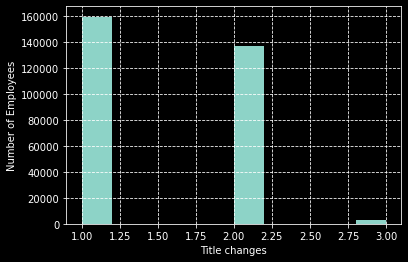

In [55]:
plt.hist(freq_title_change)
plt.xlabel('Title changes')
plt.ylabel('Number of Employees')
plt.grid(which='major',ls='--')

8. For each title, find the hire date of the employee that was hired most recently with that title.



In [56]:
emp_title_join.groupby(['title']).hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

9. Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL code to pull the necessary data and python/pandas code to perform the manipulations.)



In [57]:
schema = 'employees'
query='show tables'
pd.read_sql(query, get_db_url(schema))




,Tables_in_employees
0,departments
1,dept_emp
2,dept_manager
3,employees
4,salaries
5,titles


In [58]:

query='describe titles'
pd.read_sql(query, get_db_url(schema))

,Field,Type,Null,Key,Default,Extra
0,emp_no,int,NO,PRI,None,
1,title,varchar(50),NO,PRI,None,
2,from_date,date,NO,PRI,None,
3,to_date,date,YES,,None,


In [59]:

query='describe dept_emp'
pd.read_sql(query, get_db_url(schema))

,Field,Type,Null,Key,Default,Extra
0,emp_no,int,NO,PRI,None,
1,dept_no,char(4),NO,PRI,None,
2,from_date,date,NO,,None,
3,to_date,date,NO,,None,


In [60]:

query='describe departments'
pd.read_sql(query, get_db_url(schema))


,Field,Type,Null,Key,Default,Extra
0,dept_no,char(4),NO,PRI,None,
1,dept_name,varchar(40),NO,UNI,None,


In [61]:
query='select emp_no, title, to_date from titles where to_date > now()'
titles=pd.read_sql(query, get_db_url(schema))

titles.head()

,emp_no,title,to_date
0,10001,Senior Engineer,9999-01-01
1,10002,Staff,9999-01-01
2,10003,Senior Engineer,9999-01-01
3,10004,Senior Engineer,9999-01-01
4,10005,Senior Staff,9999-01-01


In [62]:
query='select emp_no, dept_no, to_date from dept_emp where to_date > now()'

dept_emp=pd.read_sql(query, get_db_url(schema))
dept_emp.head()


,emp_no,dept_no,to_date
0,10001,d005,9999-01-01
1,10002,d007,9999-01-01
2,10003,d004,9999-01-01
3,10004,d004,9999-01-01
4,10005,d003,9999-01-01


In [63]:
query='select * from departments'
depts=pd.read_sql(query, get_db_url(schema))

In [64]:
a=titles.merge(dept_emp,on=['emp_no','to_date'])
a.head()

,emp_no,title,to_date,dept_no
0,10001,Senior Engineer,9999-01-01,d005
1,10002,Staff,9999-01-01,d007
2,10003,Senior Engineer,9999-01-01,d004
3,10004,Senior Engineer,9999-01-01,d004
4,10005,Senior Staff,9999-01-01,d003


In [65]:
b=a.merge(depts,on='dept_no')
b.head()

,emp_no,title,to_date,dept_no,dept_name
0,10001,Senior Engineer,9999-01-01,d005,Development
1,10006,Senior Engineer,9999-01-01,d005,Development
2,10012,Senior Engineer,9999-01-01,d005,Development
3,10014,Engineer,9999-01-01,d005,Development
4,10022,Engineer,9999-01-01,d005,Development


In [66]:
dept_titles=b
dept_titles.shape





(240124, 5)

In [67]:

dept_titles_crosstab = pd.crosstab(dept_titles.dept_name, dept_titles.title)
dept_titles_crosstab


title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,11268,3574,241
Development,1652,14040,1,38816,1085,315,5477
Finance,0,0,1,0,9545,2891,0
Human Resources,0,0,1,0,9824,3073,0
Marketing,0,0,1,0,11290,3551,0
Production,1402,12081,1,33625,1123,349,4723
Quality Management,389,3405,1,9458,0,0,1293
Research,77,830,1,2250,9092,2870,321
Sales,0,0,1,0,28797,8903,0


In [68]:
dept_titles_crosstab.style.highlight_max(axis=1)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,11268,3574,241
Development,1652,14040,1,38816,1085,315,5477
Finance,0,0,1,0,9545,2891,0
Human Resources,0,0,1,0,9824,3073,0
Marketing,0,0,1,0,11290,3551,0
Production,1402,12081,1,33625,1123,349,4723
Quality Management,389,3405,1,9458,0,0,1293
Research,77,830,1,2250,9092,2870,321
Sales,0,0,1,0,28797,8903,0


I will try the other method as well.




In [69]:
dept_title_query = '''

                    SELECT t.emp_no, 
                    t.title, 
                    t.from_date, 
                    t.to_date, 
                    d.dept_name 
                    FROM departments AS d 
                    JOIN dept_emp AS de USING(dept_no) 
                    JOIN titles AS t USING(emp_no) 
                    where t.to_date>now() and  de.to_date>now();

                    '''


dept_titles=pd.read_sql(query, get_db_url(schema))
dept_titles.head()


,dept_no,dept_name
0,d009,Customer Service
1,d005,Development
2,d002,Finance
3,d003,Human Resources
4,d001,Marketing


In [70]:
dept_titles.shape

(9, 2)

In the 2nd version I copied the instructiors code. My only difference is that in the query I selected where to_date > now() for each database where to_date occured.


I can't think of reason to use only one in this case.

